<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Barcelona_Weekday_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d thedevastator/airbnb-prices-in-european-cities
! unzip '/content/airbnb-prices-in-european-cities.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [90]:
ds_df = pd.read_csv("/content/data/barcelona_weekdays.csv")
# https://zenodo.org/record/4446043#.ZEV8d-zMI-R

In [91]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1555 non-null   int64  
 1   realSum                     1555 non-null   float64
 2   room_type                   1555 non-null   object 
 3   room_shared                 1555 non-null   bool   
 4   room_private                1555 non-null   bool   
 5   person_capacity             1555 non-null   float64
 6   host_is_superhost           1555 non-null   bool   
 7   multi                       1555 non-null   int64  
 8   biz                         1555 non-null   int64  
 9   cleanliness_rating          1555 non-null   float64
 10  guest_satisfaction_overall  1555 non-null   float64
 11  bedrooms                    1555 non-null   int64  
 12  dist                        1555 non-null   float64
 13  metro_dist                  1555 

In [92]:
ds_df = ds_df.drop(columns=["Unnamed: 0"]).copy()

In [93]:
ds_df.nunique()

realSum                        474
room_type                        3
room_shared                      2
room_private                     2
person_capacity                  5
host_is_superhost                2
multi                            2
biz                              2
cleanliness_rating               8
guest_satisfaction_overall      41
bedrooms                         6
dist                          1555
metro_dist                    1555
attr_index                    1555
attr_index_norm               1555
rest_index                    1555
rest_index_norm               1555
lng                           1320
lat                           1256
dtype: int64

In [94]:
ds_df.corr().round(2)

<ipython-input-94-5fd8ea8afd93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds_df.corr().round(2)


,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
realSum,1.00,-0.04,-0.48,0.43,0.00,-0.15,0.26,-0.01,-0.05,0.41,-0.02,-0.02,0.05,0.05,0.00,0.00,-0.05,-0.02
room_shared,-0.04,1.00,-0.13,-0.00,-0.03,-0.06,0.08,-0.04,-0.02,-0.03,0.08,0.05,-0.02,-0.02,-0.04,-0.04,0.11,0.07
room_private,-0.48,-0.13,1.00,-0.74,0.02,0.25,-0.43,0.05,0.14,-0.60,0.04,0.02,-0.06,-0.06,0.03,0.03,0.04,0.00
person_capacity,0.43,-0.00,-0.74,1.00,-0.05,-0.20,0.38,-0.07,-0.15,0.74,-0.04,-0.00,0.06,0.06,-0.03,-0.03,-0.04,0.02
host_is_superhost,0.00,-0.03,0.02,-0.05,1.00,0.08,-0.13,0.25,0.29,0.01,0.03,0.03,-0.02,-0.02,-0.02,-0.02,0.00,0.02
multi,-0.15,-0.06,0.25,-0.20,0.08,1.00,-0.57,0.03,0.08,-0.15,0.02,-0.02,-0.00,-0.00,0.02,0.02,0.04,-0.02
biz,0.26,0.08,-0.43,0.38,-0.13,-0.57,1.00,-0.06,-0.17,0.25,-0.14,-0.07,0.07,0.07,0.07,0.07,-0.06,-0.07
cleanliness_rating,-0.01,-0.04,0.05,-0.07,0.25,0.03,-0.06,1.00,0.72,-0.04,-0.00,-0.02,0.00,0.00,0.00,0.00,0.02,-0.01
guest_satisfaction_overall,-0.05,-0.02,0.14,-0.15,0.29,0.08,-0.17,0.72,1.00,-0.08,0.01,0.01,0.01,0.01,0.01,0.01,0.06,0.00
bedrooms,0.41,-0.03,-0.60,0.74,0.01,-0.15,0.25,-0.04,-0.08,1.00,0.02,0.02,-0.01,-0.01,-0.10,-0.10,-0.03,0.04



# II. Preprocessing

In [95]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [96]:
reg_models = setup(data=train_df, target="realSum", session_id=123,
                   ignore_features=["attr_index", "rest_index", "lat", "lng"])


,Description,Value
0,Session id,123
1,Target,realSum
2,Target type,Regression
3,Original data shape,"(1244, 19)"
4,Transformed data shape,"(1244, 17)"
5,Transformed train set shape,"(870, 17)"
6,Transformed test set shape,"(374, 17)"
7,Ignore features,4
8,Numeric features,10
9,Categorical features,1


In [97]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,84.3305,58004.7025,211.8583,0.6393,0.3281,0.2739,0.6720
gbr,Gradient Boosting Regressor,86.5453,59769.9701,206.8911,0.6300,0.3498,0.3001,0.6880
et,Extra Trees Regressor,86.8209,63730.0266,227.6497,0.4923,0.3406,0.2849,0.5460
xgboost,Extreme Gradient Boosting,88.7303,79786.2025,241.6746,0.4796,0.3583,0.2932,0.4920
huber,Huber Regressor,89.3611,132661.9156,318.0608,0.3356,0.3552,0.2416,0.3960
en,Elastic Net,105.7082,131980.9541,320.0466,0.3181,0.4207,0.3765,0.1440
par,Passive Aggressive Regressor,109.7167,133453.1625,321.7547,0.3110,0.4410,0.3838,0.1440
br,Bayesian Ridge,113.2263,129934.0197,323.2792,0.2779,0.4511,0.3799,0.1360
lasso,Lasso Regression,116.2805,130704.4317,326.2761,0.2532,0.4833,0.3860,0.1420
llar,Lasso Least Angle Regression,116.2823,130704.6697,326.2768,0.2532,0.4833,0.3860,0.1460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

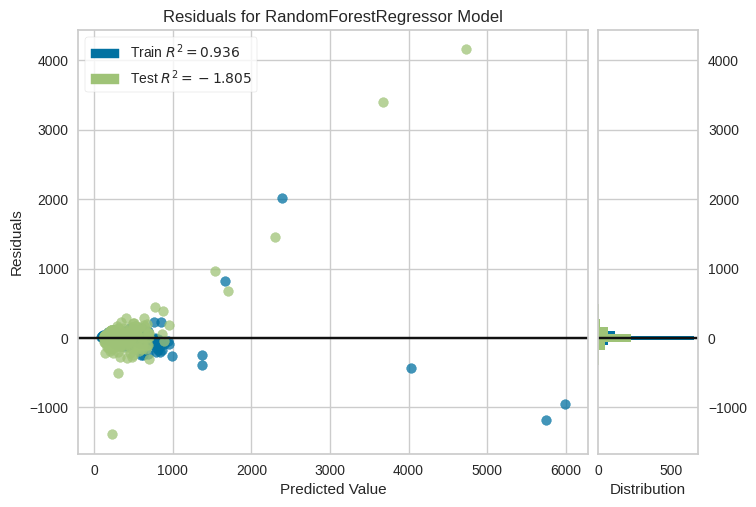

In [98]:
plot_model(best_model)

In [99]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,80.7347,27183.3683,164.8738,0.4987,0.3001,0.2345
1,70.7275,12301.3899,110.9116,0.5550,0.2745,0.2299
2,134.6878,266681.4886,516.4121,0.5008,0.3987,0.3627
3,97.2516,72175.3310,268.6547,-0.5194,0.3506,0.2943
4,73.5045,11960.7728,109.3653,0.6764,0.3412,0.3106
5,64.2907,10325.5368,101.6146,0.6833,0.2823,0.2373
6,73.5910,29057.5996,170.4629,0.4405,0.3638,0.2555
7,78.9794,20102.2664,141.7825,0.9130,0.3144,0.2877
8,73.7446,14534.7014,120.5599,0.5582,0.3457,0.2642


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [100]:
preds_rf = predict_model(rf, train_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,50.2588,37207.5928,192.8927,0.6953,0.2343,0.1680


In [101]:
preds_rf["residual"] = preds_rf["realSum"] - preds_rf["prediction_label"]
preds_rf["scaled_residual"] = preds_rf["residual"] / preds_rf["realSum"]

In [73]:
import matplotlib.pyplot as plt

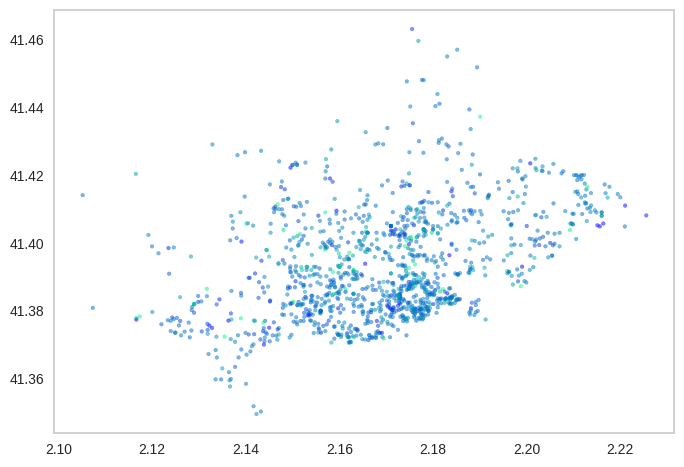

In [104]:
plt.grid(False)
plt.scatter(
    data=preds_rf, x="lng", y="lat",
    c=preds_rf["residual"].clip(
        preds_rf["residual"].quantile(.02),
        preds_rf["residual"].quantile(.98)),
    alpha=.5, cmap="winter", s=7)

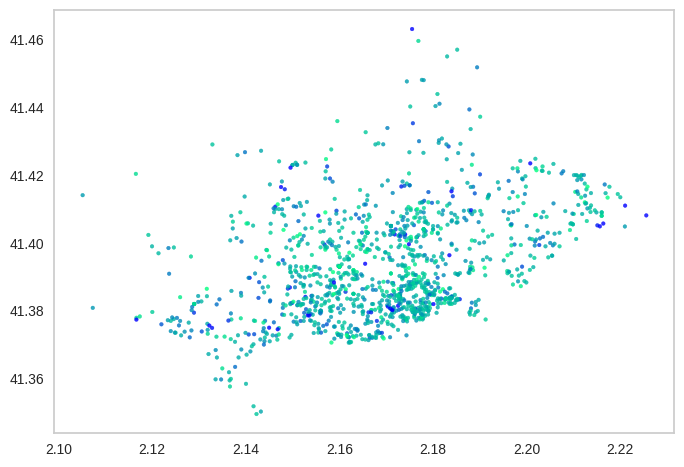

In [105]:
plt.grid(False)
plt.scatter(
    data=preds_rf, x="lng", y="lat",
    c=preds_rf["scaled_residual"].clip(
        preds_rf["scaled_residual"].quantile(.02),
        preds_rf["scaled_residual"].quantile(.98)),
    alpha=.8, cmap="winter", s=7)

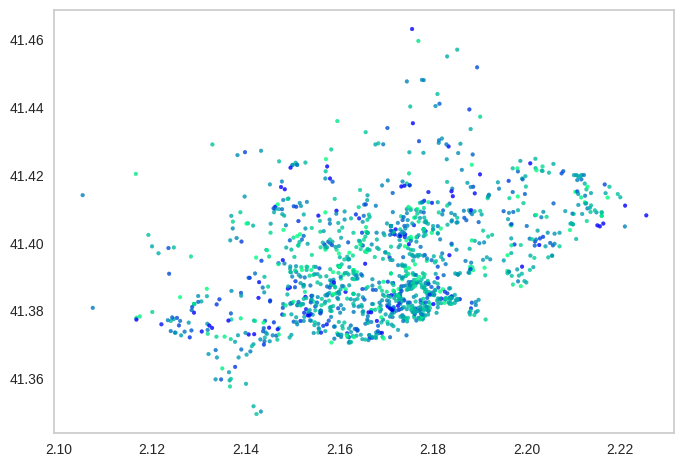

In [106]:
plt.grid(False)
plt.scatter(
    data=preds_rf, x="lng", y="lat",
    c=preds_rf["scaled_residual"].clip(
        preds_rf["scaled_residual"].quantile(.05),
        preds_rf["scaled_residual"].quantile(.95)),
    alpha=.8, cmap="winter", s=7)

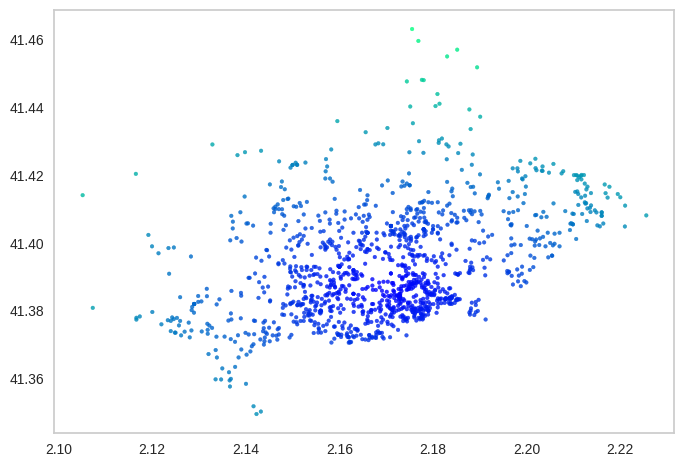

In [107]:
plt.grid(False)
plt.scatter(
    data=preds_rf, x="lng", y="lat",
    c=preds_rf["dist"],
    alpha=.8, cmap="winter", s=7)